# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
pd.set_option('display.max_columns', 100)

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

## 1. Data Cleaning

In [167]:
df = pd.read_csv('training_data.csv' , index_col=0)

In [168]:
rename_list = ["max_credit", "gender", "education", "marital_status", "age",
               "pay_status_sep", "pay_status_aug", "pay_status_jul", "pay_status_jun", "pay_status_may", "pay_status_apr",
               "bill_sep", "bill_aug", "bill_jul", "bill_jun", "bill_may", "bill_apr",
               "payment_sep", "payment_aug", "payment_jul", "payment_jun", "payment_may", "payment_apr",
                "default"]
col_rename = dict(zip(df.columns,rename_list))
df = df.rename(columns=col_rename)
df = df.drop(df.index[18381])
for colname in rename_list:
    df[colname] = df[colname].astype(float)
categorical = ['gender', 'education', 'marital_status']
for colname in categorical:
    df[colname] = df[colname].astype(object)

In [169]:
df.head()

,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,pay_status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payment_jul,payment_jun,payment_may,payment_apr,default
28835,220000.0,2,1,2,36.0,0.0,0.0,0.0,0.0,0.0,0.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0
25329,200000.0,2,3,2,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0
18894,180000.0,2,1,2,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,80000.0,1,2,2,32.0,0.0,0.0,0.0,0.0,0.0,0.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0
6239,10000.0,1,2,2,27.0,0.0,0.0,0.0,0.0,0.0,0.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0


In [170]:
df.default.value_counts()

0.0    17471
1.0     5028
Name: default, dtype: int64

In [171]:
df.isnull().sum()

max_credit        0
gender            0
education         0
marital_status    0
age               0
pay_status_sep    0
pay_status_aug    0
pay_status_jul    0
pay_status_jun    0
pay_status_may    0
pay_status_apr    0
bill_sep          0
bill_aug          0
bill_jul          0
bill_jun          0
bill_may          0
bill_apr          0
payment_sep       0
payment_aug       0
payment_jul       0
payment_jun       0
payment_may       0
payment_apr       0
default           0
dtype: int64

In [172]:
df.dtypes

max_credit        float64
gender             object
education          object
marital_status     object
age               float64
pay_status_sep    float64
pay_status_aug    float64
pay_status_jul    float64
pay_status_jun    float64
pay_status_may    float64
pay_status_apr    float64
bill_sep          float64
bill_aug          float64
bill_jul          float64
bill_jun          float64
bill_may          float64
bill_apr          float64
payment_sep       float64
payment_aug       float64
payment_jul       float64
payment_jun       float64
payment_may       float64
payment_apr       float64
default           float64
dtype: object

In [173]:
df.describe()

,max_credit,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,pay_status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payment_jul,payment_jun,payment_may,payment_apr,default
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,167054.521534,35.447931,-0.014090,-0.128806,-0.160185,-0.214587,-0.259700,-0.287613,51455.869416,49385.313214,4.704213e+04,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477
std,129864.960118,9.237634,1.123191,1.197954,1.198880,1.174824,1.139984,1.154249,74470.257248,71953.814345,6.991792e+04,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3506.000000,2975.000000,2.611500e+03,2319.500000,1732.500000,1230.000000,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22387.000000,21145.000000,2.005300e+04,19048.000000,18050.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66988.500000,63755.000000,6.016100e+04,54494.500000,50196.000000,49250.000000,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000,0.000000
max,1000000.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000,1.000000


## 2. EDA

In [174]:

# ## EDA

# - See if there are relations between variables to create additional variables
#   - catagories of variables and see if the distributions clump in specific ways
#      - If so bin them
#   - look at scatterplots of cont variables
#      - if there are groupings in those scatter plots, bin the categorical variables
#      
#      - if there are trends, we can create additional variables specify the relationships
#        - if we see an exponential curve, we can create a new cariable taking the log, etc
#      

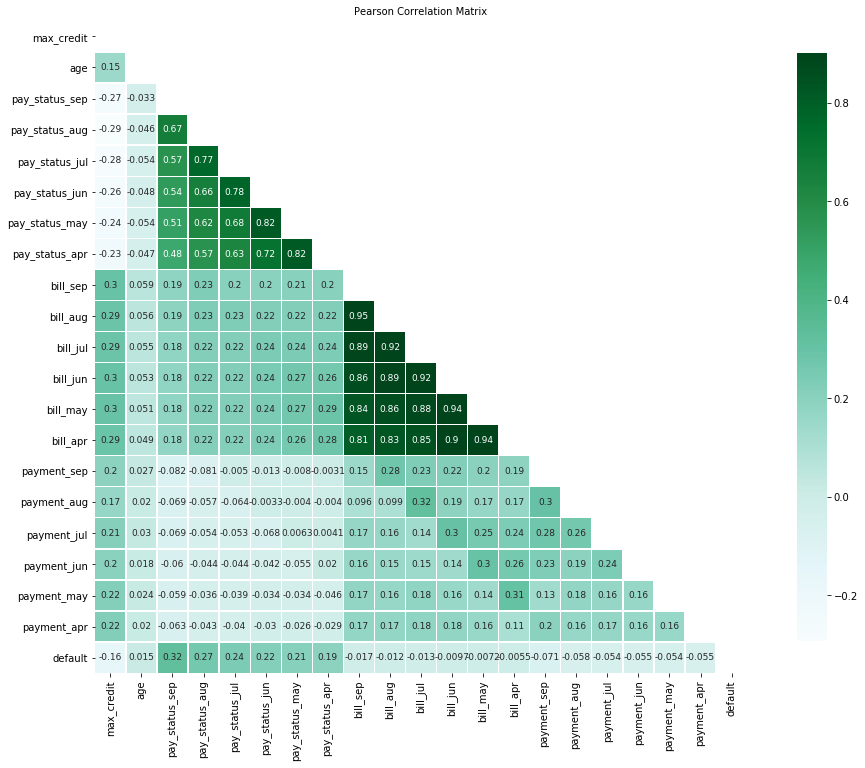

In [175]:
# Checking the correlation between the features
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

### Start with Target Variable (default: If an individual defaulted on loan)

In [176]:
#Default Count
print('Target Variable')
print(df.groupby(['default']).default.count())

Target Variable
default
0.0    17471
1.0     5028
Name: default, dtype: int64


In [177]:
#Percentages 
print("Percent Paid")
print((df.groupby(['default']).default.count()[0]/df.groupby(['default']).default.count().sum()))
print("Percent Defaulted")
print((df.groupby(['default']).default.count()[1]/df.groupby(['default']).default.count().sum()))

Percent Paid
0.7765234010400462
Percent Defaulted
0.22347659895995378


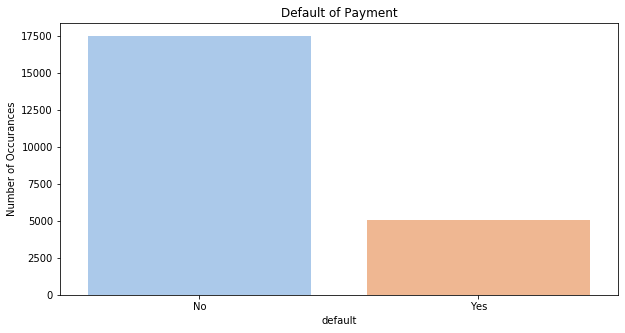

In [178]:
#Target Variable Countplot
plt.figure(figsize = (10,5))
sns.countplot(df['default'], palette='pastel')
plt.title('Default of Payment')
plt.ylabel('Number of Occurances')
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.show()

In [179]:
### High class imbalance, could consider weighing 

In [180]:
#Add Log_default
#df['log_default'] = np.where(df['default'], np.log(df['default']), df['default'])

### First continuous variable (Max Credit)

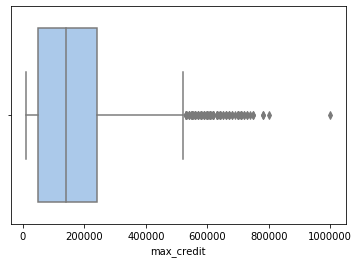

In [181]:
sns.boxplot(df.max_credit,palette ='pastel')

In [182]:
df[df['max_credit']>800000]
#Seems to be Legitimate 

,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,pay_status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payment_jul,payment_jun,payment_may,payment_apr,default
2198,1000000.0,2,1,1,47.0,0.0,0.0,0.0,-1.0,0.0,0.0,964511.0,983931.0,535020.0,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0.0


Text(0.5, 1.0, 'Paid & Default by Max Credit')

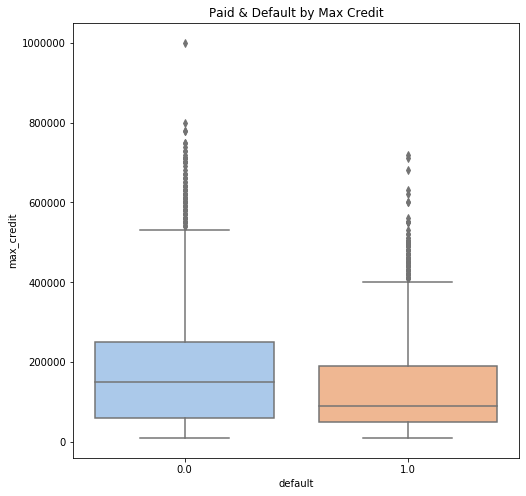

In [183]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'default', y = 'max_credit', data = df, palette= 'pastel').set_title('Paid & Default by Max Credit')

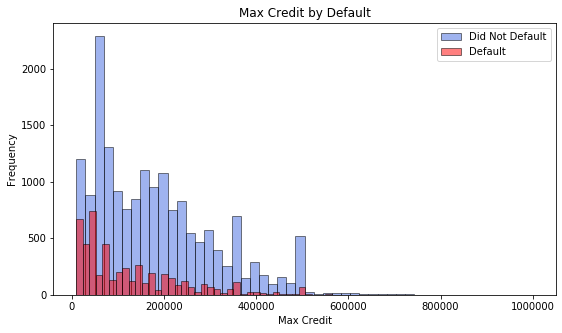

In [185]:
fig, ax = plt.subplots(figsize = (9,5));
plt.hist(df[df['default'] ==0].max_credit, bins = 50,label ='Did Not Default', alpha = .50, edgecolor= 'black',color='royalblue')
plt.hist(df[df['default']==1].max_credit, bins = 50,label = 'Default',alpha = .50, edgecolor = 'black', color='r')
plt.title('Max Credit by Default')
plt.xlabel('Max Credit')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')

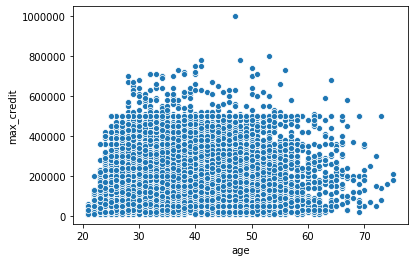

In [186]:
sns.scatterplot(df.age,df.max_credit)

#dont see much relationship between age and max credit

### Second continuous variable (Age)

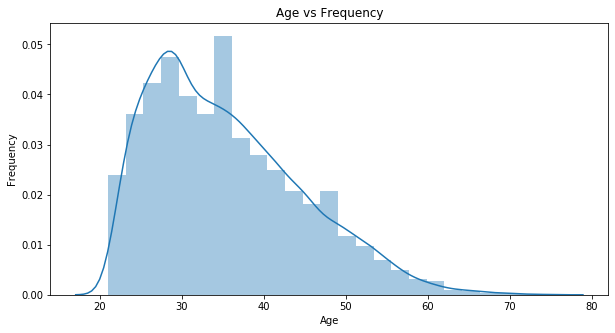

In [187]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df.age,kde=True,bins=25);
ax.set(xlabel='Age', ylabel='Frequency', title='Age vs Frequency');

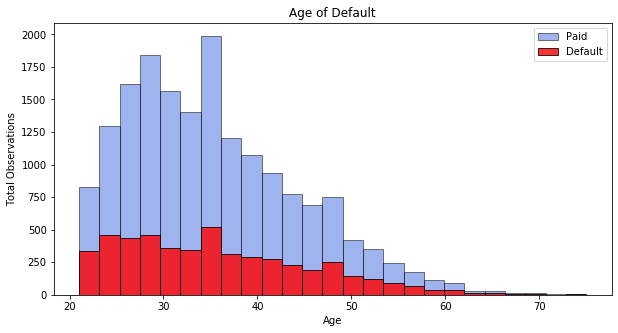

In [196]:
fig, ax = plt.subplots(figsize = (10,5));
plt.hist(df[df['default'] ==0].age, bins = 25,label ='Paid', alpha = .50,edgecolor= 'black',color='royalblue')
plt.hist(df[df['default']==1].age, bins = 25,label = 'Default', alpha = .80, edgecolor = 'black', color='r')
plt.title('Age of Default')
plt.xlabel('Age')
plt.ylabel('Total Observations')
plt.legend(loc = 'upper right')

#Can consider binning ages young(0 to 28), middle(29 to 36), old(36+)


### Gender

default    0.0   1.0
gender              
1.0       6758  2169
2.0      10713  2859


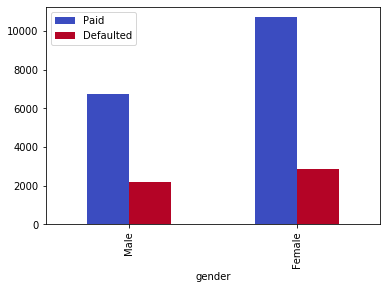

In [229]:
# Default Gender
print(df.groupby(['gender','default']).gender.count().unstack())

# Default Gender Visualization
gen_d = df.groupby(['gender']).default.value_counts().unstack()
gen_d.plot(kind = 'bar', colormap = 'coolwarm')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend(['Paid','Defaulted'])
plt.show()

### Education

default       0.0     1.0
education                
0.0          11.0     NaN
1.0        6388.0  1531.0
2.0        7998.0  2518.0
3.0        2764.0   949.0
4.0          84.0     6.0
5.0         191.0    17.0
6.0          35.0     7.0


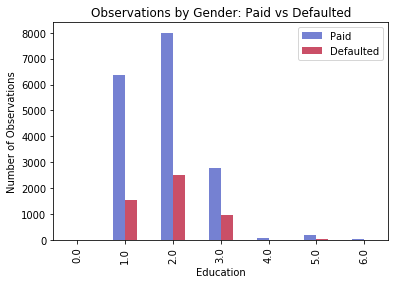

In [228]:
# Default by Gender Values
print(df.groupby(['education','default']).gender.count().unstack())
# Default by Gender Visualization
pclass = df.groupby(['education','default']).gender.count().unstack()
p1 = pclass.plot(kind = 'bar', title = 'Observations by Gender: Paid vs Defaulted', 
                 colormap = 'coolwarm', alpha = .70)
p1.set_xlabel('Education')
p1.set_ylabel('Number of Observations')
p1.legend(['Paid','Defaulted'])
plt.show()

# 0|1 = Graduate, 2 = College, 3 = High School, 4|5|6 = Other

In [664]:
df.education.value_counts()

2.0    10516
1.0     7919
3.0     3713
5.0      208
4.0       90
6.0       42
0.0       11
Name: education, dtype: int64

In [665]:
df[df['education']==0]

,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,pay_status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payment_jul,payment_jun,payment_may,payment_apr,default
6877,360000.0,1,0,2,30.0,0.0,0.0,-1.0,0.0,0.0,-1.0,40250.0,23022.0,12272.0,34345.0,36777.0,30.0,23000.0,12280.0,25007.0,25008.0,1767.0,3300.0,0.0
15108,210000.0,1,0,2,45.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,2563.0,5854.0,1032.0,788.0,3499.0,3372.0,5854.0,1032.0,788.0,3565.0,3372.0,15381.0,0.0
3770,290000.0,2,0,2,38.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1437.0,3070.0,1406.0,2196.0,1481.0,1437.0,3078.0,1406.0,2196.0,1481.0,0.0,0.0
17415,230000.0,2,0,2,47.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,8394.0,5743.0,1336.0,255.0,5425.0,4838.0,5743.0,1598.0,0.0,5425.0,4838.0,3840.0,0.0
20031,200000.0,2,0,2,30.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,17160.0,7289.0,2868.0,9470.0,5816.0,7809.0,2880.0,0.0,9470.0,5834.0,7809.0,2886.0,0.0
16897,200000.0,1,0,2,40.0,1.0,-2.0,-1.0,-1.0,-1.0,-2.0,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,0.0
27156,160000.0,1,0,1,47.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,386.0,907.0,3707.0,6987.0,3853.0,4613.0,907.0,3707.0,6991.0,77.0,4613.0,4099.0,0.0
19921,50000.0,2,0,1,40.0,0.0,0.0,0.0,0.0,0.0,0.0,44749.0,46229.0,46798.0,47647.0,40500.0,41921.0,2229.0,2298.0,2100.0,2500.0,1921.0,8432.0,0.0
5946,270000.0,1,0,2,39.0,1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,10193.0,69553.0,18607.0,0.0,0.0,10193.0,70213.0,19008.0,399.0,0.0,0.0,0.0
16882,100000.0,1,0,2,37.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,7642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Marital Status:  (1 = married; 2 = single; 3 = others)

default          0.0   1.0
marital_status            
0.0               40     4
1.0             7770  2425
2.0             9475  2551
3.0              186    48


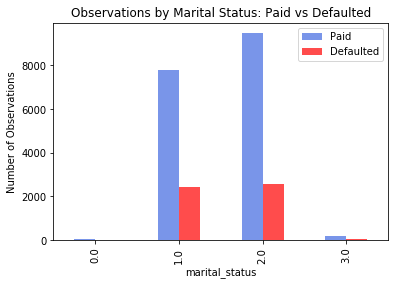

In [230]:
# Default by Marital Values
print(df.groupby(['marital_status','default']).gender.count().unstack())
# Default by Marital Values Visualization
pclass = df.groupby(['marital_status','default']).gender.count().unstack()
p2 = pclass.plot(kind = 'bar', title = 'Observations by Marital Status: Paid vs Defaulted', 
                 color = ['royalblue', 'r'], alpha = .70)
p2.set_xlabel('marital_status')
p2.set_ylabel('Number of Observations')
p2.legend(['Paid','Defaulted'])
plt.show()

In [668]:
df[df['marital_status']==0]

,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,pay_status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payment_jul,payment_jun,payment_may,payment_apr,default
3057,200000.0,1,3,0,36.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,5644.0,82620.0,14129.0,41359.0,9140.0,0.0,89187.0,14178.0,41359.0,9140.0,0.0,0.0,0.0
821,200000.0,2,3,0,51.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,780.0,0.0,390.0,780.0,390.0,390.0,0.0,390.0,780.0,0.0,390.0,390.0,0.0
23361,240000.0,2,3,0,37.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,374.0,1823.0,1788.0,6229.0,15829.0,20785.0,1823.0,1788.0,6229.0,10000.0,10000.0,5640.0,0.0
9974,80000.0,2,3,0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,59451.0,29668.0,22740.0,13099.0,6551.0,0.0,1834.0,2124.0,0.0,0.0,0.0,0.0,0.0
10209,50000.0,2,1,0,45.0,-1.0,-1.0,-2.0,-2.0,-1.0,2.0,4736.0,0.0,0.0,0.0,4881.0,4634.0,0.0,0.0,0.0,4881.0,0.0,0.0,0.0
18307,230000.0,2,3,0,30.0,-1.0,-1.0,-1.0,2.0,0.0,-1.0,291.0,763.0,2403.0,2205.0,1210.0,291.0,763.0,2403.0,0.0,0.0,291.0,291.0,0.0
16582,20000.0,1,3,0,29.0,5.0,4.0,3.0,2.0,3.0,3.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1020,180000.0,2,3,0,45.0,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0,4148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23136,20000.0,2,3,0,35.0,0.0,-1.0,2.0,2.0,-1.0,-1.0,3975.0,362.0,2182.0,1500.0,500.0,0.0,362.0,2000.0,0.0,500.0,0.0,0.0,0.0
28767,80000.0,2,3,0,40.0,2.0,2.0,3.0,2.0,-1.0,-1.0,1140.0,5395.0,4415.0,1375.0,779.0,5889.0,5000.0,0.0,0.0,885.0,5889.0,4239.0,0.0


### Amount on Bill Statement

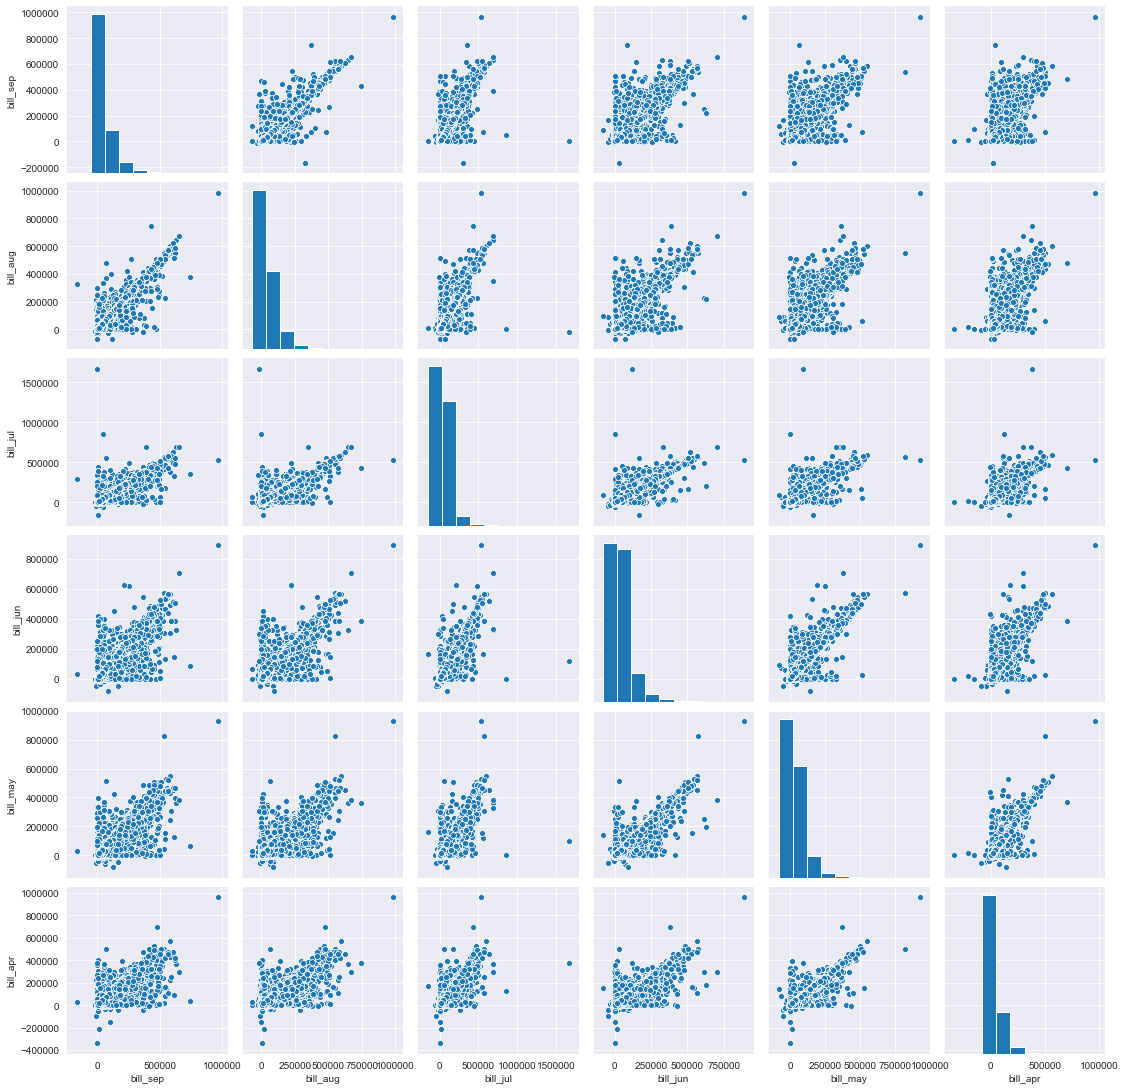

In [669]:
sns.pairplot(df[['bill_sep','bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr']])
#Highly Correlated

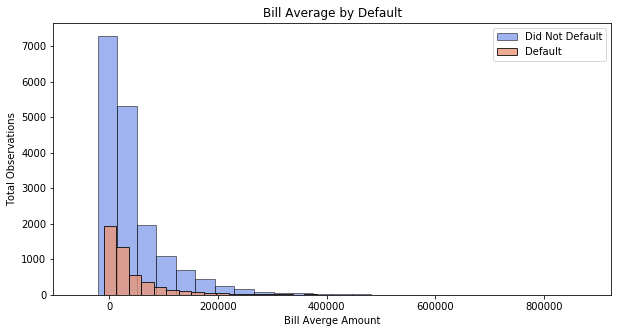

In [441]:
fig, ax = plt.subplots(figsize = (10,5));
plt.hist(df[df['default'] ==0].bill_avg, bins = 25,label ='Did Not Default', alpha = .50,edgecolor= 'black',color='royalblue')
plt.hist(df[df['default']==1].bill_avg, bins = 25,label = 'Default', alpha = .80, edgecolor = 'black', color='darksalmon')
plt.title('Bill Average by Default')
plt.xlabel('Bill Averge Amount')
plt.ylabel('Total Observations')
plt.legend(loc = 'upper right')


In [671]:
df.loc[(df.bill_sep < 10) & (df.default==1)]

,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,pay_status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payment_jul,payment_jun,payment_may,payment_apr,default
5801,120000.0,1,1,1,50.0,1.0,-2.0,-2.0,-1.0,0.0,-1.0,0.0,-2008.0,-4016.0,4016.0,2008.0,8299.0,0.0,0.0,10040.0,0.0,8299.0,0.0,1.0
14586,110000.0,2,1,2,32.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1992,360000.0,1,1,2,65.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
275,360000.0,2,2,2,28.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13078,50000.0,2,2,2,34.0,1.0,-2.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,400.0,0.0,600.0,600.0,0.0,400.0,0.0,600.0,0.0,4275.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,30000.0,1,2,1,33.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7320,500000.0,1,1,1,43.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
587,220000.0,1,1,1,43.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13128,100000.0,2,1,2,32.0,1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,325.0,650.0,325.0,647.0,7706.0,650.0,650.0,0.0,647.0,7706.0,1679.0,1.0


### Pay Status : -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

default           0.0   1.0
pay_status_sep             
0               14919  2458
1                1841   909
2                 673  1598
3                  38    63


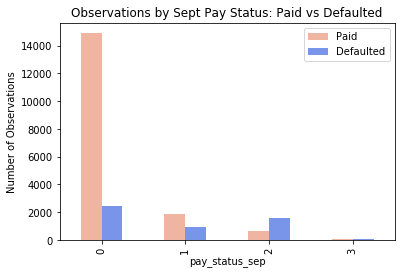

In [478]:
# Default by Pay Status Values
print(df.groupby(['pay_status_sep','default']).gender.count().unstack())
# Default by Pay Status Visualization
pclass = df.groupby(['pay_status_sep','default']).gender.count().unstack()
p1 = pclass.plot(kind = 'bar', title = 'Observations by Sept Pay Status: Paid vs Defaulted', 
                 color = ['darksalmon','royalblue'], alpha = .70)
p1.set_xlabel('pay_status_sep')
p1.set_ylabel('Number of Observations')
p1.legend(['Paid','Defaulted'])
plt.show()

In [673]:
#Not sure what -2,0 but am assuming it shows good payment habits

### Payments

In [674]:
# Will test taking Payment avgs similar to Bill_avg

In [438]:
df.payment_avg.describe()

count     22499.000000
mean       5292.854497
std       10528.220177
min           0.000000
25%        1100.000000
50%        2382.166670
75%        5583.750000
max      627344.333330
Name: payment_avg, dtype: float64

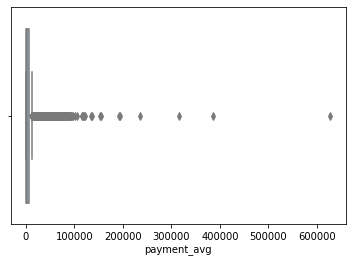

In [439]:
sns.boxplot(df.payment_avg,palette ='pastel')

In [582]:
df[df['payment_avg'] > 300000]

KeyError: 'payment_avg'

### Test out Limit Paid Ratio

In [621]:
df

,max_credit,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,default,age_middle,age_old,education_2.0,education_3.0,education_4.0,marital_status_2.0,marital_status_3.0,pay_status_sep_1,pay_status_sep_2,pay_status_sep_3,pay_status_aug_1,pay_status_aug_2,pay_status_aug_3,pay_status_jul_1,pay_status_jul_2,pay_status_jul_3,pay_status_jun_1,pay_status_jun_2,pay_status_jun_3,pay_status_may_1,pay_status_may_2,pay_status_may_3,pay_status_apr_1,pay_status_apr_2,pay_status_apr_3,bill_avg,payment_avg,gender_2.0
28835,220000.0,222598.0,222168.0,217900.0,221193.0,181859.0,184605.0,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,208387.16667,31485.16667,1
25329,200000.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,326.00000,326.00000,1
18894,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,1
690,80000.0,51372.0,51872.0,47593.0,43882.0,42256.0,42527.0,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46583.66667,1601.83333,0
6239,10000.0,8257.0,7995.0,4878.0,5444.0,2639.0,2697.0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5318.33333,883.33333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,40000.0,35183.0,39197.0,39477.0,39924.0,39004.0,41462.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,39041.16667,1711.50000,1
2693,350000.0,3800.0,3138.0,4150.0,3750.0,1362.0,8210.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4068.33333,5210.16667,0
8076,100000.0,0.0,203.0,203.0,0.0,7856.0,16544.0,0.0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4134.33333,3154.00000,1
20213,20000.0,5141.0,3455.0,6906.0,0.0,0.0,0.0,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2583.66667,1825.00000,1


## 3. Feature Engineering

In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
pd.set_option('display.max_columns', 100)

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('training_data.csv' , index_col=0)

In [4]:
rename_list = ["max_credit", "gender", "education", "marital_status", "age",
               "pay_status_sep", "pay_status_aug", "pay_status_jul", "pay_status_jun", "pay_status_may", "pay_status_apr",
               "bill_sep", "bill_aug", "bill_jul", "bill_jun", "bill_may", "bill_apr",
               "payment_sep", "payment_aug", "payment_jul", "payment_jun", "payment_may", "payment_apr",
                "default"]
col_rename = dict(zip(df.columns,rename_list))
df = df.rename(columns=col_rename)
df = df.drop(df.index[18381])
for colname in rename_list:
    df[colname] = df[colname].astype("int64")
categorical = ['gender', 'education', 'marital_status']
for colname in categorical:
    df[colname] = df[colname].astype(object)

In [5]:
##### Create Age Bins #####
bins = [0,28,40,100]
labels = ['young','middle','old']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels)
##### Get Dummies #####
df = pd.get_dummies(df, columns = ['age'], drop_first= True)

In [6]:
##### Education Convert 4,5,6 to 'Other' : Add 0 to 'Graduate'#####
df['education'] = np.where(df['education'] <= 3, 0,df['education'])
df['education'] = np.where(df['education'] > 3, 1,df['education'])

In [7]:
##### Marital Status 0,3 to 'Other' Column #####
df['marital_status'] = np.where(df['marital_status'] == 0, 3,df['marital_status'])
##### Get Dummies #####
df = pd.get_dummies(df, columns = ['marital_status'], drop_first= True)

In [8]:
df['Avg_exp_5'] = ((df['bill_may'] - (df['bill_apr'] - df['payment_may']))) / df['max_credit']
df['Avg_exp_4'] = (((df['bill_may'] - (df['bill_apr'] - df['payment_may'])) +
                 (df['bill_jun'] - (df['bill_may'] - df['payment_jun']))) / 2) / df['max_credit']
df['Avg_exp_3'] = (((df['bill_may'] - (df['bill_apr'] - df['payment_may'])) +
                 (df['bill_jun'] - (df['bill_may'] - df['payment_jun'])) +
                 (df['bill_jul'] - (df['bill_jun'] - df['payment_jul']))) / 3) / df['max_credit']
df['Avg_exp_2'] = (((df['bill_may'] - (df['bill_apr'] - df['payment_may'])) +
                 (df['bill_jun'] - (df['bill_may'] - df['payment_jun'])) +
                 (df['bill_jul'] - (df['bill_jun'] - df['payment_jul'])) +
                 (df['bill_aug'] - (df['bill_jul'] - df['payment_aug']))) / 4) / df['max_credit']
df['Avg_exp_1'] = (((df['bill_may'] - (df['bill_apr'] - df['payment_may'])) +
                 (df['bill_jun'] - (df['bill_may'] - df['payment_jun'])) +
                 (df['bill_jul'] - (df['bill_jun'] - df['payment_jul'])) +
                 (df['bill_aug'] - (df['bill_jul'] - df['payment_aug'])) +
                 (df['bill_sep'] - (df['bill_aug'] - df['payment_sep']))) / 5) / df['max_credit']

In [9]:
df['Closeness_6'] = (df.max_credit - df.bill_apr) / df.max_credit
df['Closeness_5'] = (df.max_credit - df.bill_may) / df.max_credit
df['Closeness_4'] = (df.max_credit - df.bill_jun) / df.max_credit
df['Closeness_3'] = (df.max_credit - df.bill_jul) / df.max_credit
df['Closeness_2'] = (df.max_credit - df.bill_aug) / df.max_credit
df['Closeness_1'] = (df.max_credit - df.bill_sep) / df.max_credit

df['closeness_avg'] = round((df['Closeness_6'] + df['Closeness_5'] 
+ df['Closeness_4'] + df['Closeness_3'] + df['Closeness_2'] + df['Closeness_1'])/6,5)

df.drop(columns=['Closeness_6','Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2', 
                 'Closeness_1'],inplace=True)



In [10]:
### Create Bins for Pay Status ###
### Good, OK, Bad,
pay_stat = [column for column in df if column.startswith('pay_status')]

for column in pay_stat:
    bins = [-3,1,3,9]
    labels = ['good','ok','bad']
    df[column] = pd.cut(df[column], bins=bins, labels=labels)

In [11]:
### Create Pay Status Total Column ###

#df['pay_stat_total']=(df["pay_status_sep"]+ df["pay_status_aug"]+ 
#                      df["pay_status_jul"]+ df["pay_status_jun"]+ 
#                      df["pay_status_may"]+ df["pay_status_apr"])

#df = pd.get_dummies(df, columns = ['pay_stat_total'], drop_first= True)
#df['pay_stat_total_12'] = 0

In [12]:
#for colname in pay_stat:
#    df.drop(columns=[colname],inplace=True)

In [13]:
### Create Dummies for Pay Status
for c in pay_stat:
    df = pd.get_dummies(df, columns = [c], drop_first = True)

In [14]:
### Create Max Credit:Payment ratio columns

#df['max_pay_ratio_sep']=(df['max_credit']- df['payment_sep'])/df['max_credit']
#df['max_pay_ratio_aug']=(df['max_credit']- df['payment_aug'])/df['max_credit']
#df['max_pay_ratio_jul']=(df['max_credit']- df['payment_jul'])/df['max_credit']
#df['max_pay_ratio_jun']=(df['max_credit']- df['payment_jun'])/df['max_credit']
#df['max_pay_ratio_may']=(df['max_credit']- df['payment_may'])/df['max_credit']
#df['max_pay_ratio_apr']=(df['max_credit']- df['payment_apr'])/df['max_credit']

In [15]:
#Testing taking the averages of all max pay ratios statements
#df['max_pay_ratio_avg'] = round((df['max_pay_ratio_sep'] + df['max_pay_ratio_aug'] 
#+ df['max_pay_ratio_jul'] + df['max_pay_ratio_jun'] + df['max_pay_ratio_may'] + df['max_pay_ratio_apr'])/6,5)

#df.drop(columns=['max_pay_ratio_sep','max_pay_ratio_aug', 'max_pay_ratio_jul', 
 #                'max_pay_ratio_jun', 'max_pay_ratio_may', 'max_pay_ratio_apr'],inplace=True)

In [16]:
#Testing taking the averages of all bill statements
df['bill_avg'] = round((df['bill_sep'] + df['bill_aug'] 
+ df['bill_jul'] + df['bill_jun'] + df['bill_may'] + df['bill_apr'])/6,5)

df.drop(columns=['bill_sep','bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr'],inplace=True)

In [17]:
#Testing taking the averages of all Payment Amounts
df['payment_avg'] = round((df['payment_sep'] + df['payment_aug'] 
+ df['payment_jul'] + df['payment_jun'] + df['payment_may'] + df['payment_apr'])/6,5)

df.drop(columns=['payment_sep','payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_apr'],inplace=True)

In [18]:
# Create Column that Calculates Average Payments vs Average Bill Statement
#df['bill_pay_prop'] = np.where(df['bill_avg'] != 0, round(df['payment_avg'] / df['bill_avg'],5),df['bill_avg'])

In [19]:
# Create Column that Calculates the proportion of Max Credit to Average Bill
#df['bill_cred_prop'] = np.where(df['bill_avg'] != 0, round(df['bill_avg'] / df['max_credit'],5),df['bill_avg'])

In [20]:
##### Get Dummies for Gender #####
df = pd.get_dummies(df, columns = ['gender'], drop_first= True)

In [21]:
#### Create Log Max Credit to get better Distribution
df['log_max_credit'] = np.where(df['max_credit'], np.log(df['max_credit']), df['max_credit'])
df.drop(columns=['max_credit'],inplace=True)

## 4. Feature Selection

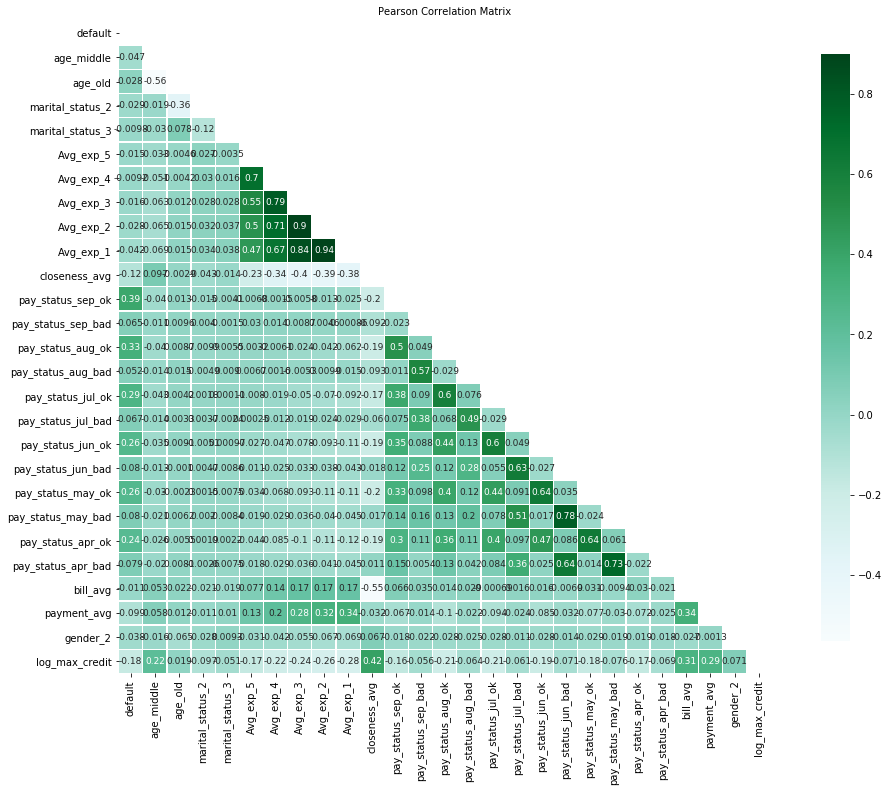

In [22]:
# Checking the correlation between the features
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

In [27]:
for colname in df.columns:
    df[colname] = df[colname].astype(float)

In [28]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('default', axis=1) # grabs everything else but 'Default'

# Create target variable
y = df['default'] # y is the column we're trying to predict

In [29]:
corrs_dict={}
for col in X.columns:
    corr=y.corr(X[col])
    corrs_dict[corr]=col

In [30]:
sorted(corrs_dict.items(),reverse=True)

[(0.38622574001155335, 'pay_status_sep_ok'),
 (0.33335547187636977, 'pay_status_aug_ok'),
 (0.2895712627968767, 'pay_status_jul_ok'),
 (0.26455038308411466, 'pay_status_jun_ok'),
 (0.25785649425344204, 'pay_status_may_ok'),
 (0.24027942925752865, 'pay_status_apr_ok'),
 (0.0798398807252769, 'pay_status_may_bad'),
 (0.07954788783733305, 'pay_status_jun_bad'),
 (0.0788900111312089, 'pay_status_apr_bad'),
 (0.06715383383641066, 'pay_status_jul_bad'),
 (0.06452572982200139, 'pay_status_sep_bad'),
 (0.05187912615764439, 'pay_status_aug_bad'),
 (0.02811855221709342, 'age_old'),
 (-0.009192175988327719, 'Avg_exp_4'),
 (-0.00978051296984559, 'marital_status_3'),
 (-0.011437721097763148, 'bill_avg'),
 (-0.014827036096691936, 'Avg_exp_5'),
 (-0.01639088727147724, 'Avg_exp_3'),
 (-0.027745826569036663, 'Avg_exp_2'),
 (-0.029203661047709075, 'marital_status_2'),
 (-0.037952654269024326, 'gender_2'),
 (-0.04021429240366141, 'education'),
 (-0.04177531902098712, 'Avg_exp_1'),
 (-0.04704805353418221, 

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_(X):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif['Features'] = X.columns
    return vif
Vif = vif_(X)

In [32]:
Vif.sort_values('VIF',ascending=False)[:5]

,VIF,Features
26,29.151894,log_max_credit
8,18.353939,Avg_exp_2
9,13.326329,Avg_exp_1
10,11.617344,closeness_avg
7,9.529638,Avg_exp_3


### Generate Polynomials

In [2373]:
from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(X)
poly2_columns = poly_2.get_feature_names(X.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
print(df_poly2.shape)
df_poly2.head()

(22499, 405)


,age_middle,age_old,education_1,marital_status_2,marital_status_3,Avg_exp_5,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,closeness_avg,pay_status_sep_ok,pay_status_sep_bad,pay_status_aug_ok,pay_status_aug_bad,pay_status_jul_ok,pay_status_jul_bad,pay_status_jun_ok,pay_status_jun_bad,pay_status_may_ok,pay_status_may_bad,pay_status_apr_ok,pay_status_apr_bad,bill_avg,payment_avg,gender_2,log_max_credit,age_middle^2,age_middle age_old,age_middle education_1,age_middle marital_status_2,age_middle marital_status_3,age_middle Avg_exp_5,age_middle Avg_exp_4,age_middle Avg_exp_3,age_middle Avg_exp_2,age_middle Avg_exp_1,age_middle closeness_avg,age_middle pay_status_sep_ok,age_middle pay_status_sep_bad,age_middle pay_status_aug_ok,age_middle pay_status_aug_bad,age_middle pay_status_jul_ok,age_middle pay_status_jul_bad,age_middle pay_status_jun_ok,age_middle pay_status_jun_bad,age_middle pay_status_may_ok,age_middle pay_status_may_bad,age_middle pay_status_apr_ok,age_middle pay_status_apr_bad,...,pay_status_jun_ok pay_status_apr_bad,pay_status_jun_ok bill_avg,pay_status_jun_ok payment_avg,pay_status_jun_ok gender_2,pay_status_jun_ok log_max_credit,pay_status_jun_bad^2,pay_status_jun_bad pay_status_may_ok,pay_status_jun_bad pay_status_may_bad,pay_status_jun_bad pay_status_apr_ok,pay_status_jun_bad pay_status_apr_bad,pay_status_jun_bad bill_avg,pay_status_jun_bad payment_avg,pay_status_jun_bad gender_2,pay_status_jun_bad log_max_credit,pay_status_may_ok^2,pay_status_may_ok pay_status_may_bad,pay_status_may_ok pay_status_apr_ok,pay_status_may_ok pay_status_apr_bad,pay_status_may_ok bill_avg,pay_status_may_ok payment_avg,pay_status_may_ok gender_2,pay_status_may_ok log_max_credit,pay_status_may_bad^2,pay_status_may_bad pay_status_apr_ok,pay_status_may_bad pay_status_apr_bad,pay_status_may_bad bill_avg,pay_status_may_bad payment_avg,pay_status_may_bad gender_2,pay_status_may_bad log_max_credit,pay_status_apr_ok^2,pay_status_apr_ok pay_status_apr_bad,pay_status_apr_ok bill_avg,pay_status_apr_ok payment_avg,pay_status_apr_ok gender_2,pay_status_apr_ok log_max_credit,pay_status_apr_bad^2,pay_status_apr_bad bill_avg,pay_status_apr_bad payment_avg,pay_status_apr_bad gender_2,pay_status_apr_bad log_max_credit,bill_avg^2,bill_avg payment_avg,bill_avg gender_2,bill_avg log_max_credit,payment_avg^2,payment_avg gender_2,payment_avg log_max_credit,gender_2^2,gender_2 log_max_credit,log_max_credit^2
0,1.0,0.0,0.0,1.0,0.0,0.037459,0.121775,0.091529,0.082608,0.075568,0.05279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208387.16667,31485.16667,1.0,12.301383,1.0,0.0,0.0,1.0,0.0,0.037459,0.121775,0.091529,0.082608,0.075568,0.05279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.342521e+10,6.561105e+09,208387.16667,2.563450e+06,9.913157e+08,31485.16667,387311.088527,1.0,12.301383,151.324019
1,1.0,0.0,0.0,1.0,0.0,0.001630,0.001630,0.001630,0.001630,0.001630,0.99837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326.00000,326.00000,1.0,12.206073,1.0,0.0,0.0,1.0,0.0,0.001630,0.001630,0.001630,0.001630,0.001630,0.99837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.062760e+05,1.062760e+05,326.00000,3.979180e+03,1.062760e+05,326.00000,3979.179682,1.0,12.206073,148.988209
2,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,1.0,12.100712,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.00000,0.00

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## Baseline Logistic Model

In [33]:
#Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=40)

In [34]:
# Scale the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train, columns = X.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(data = X_test,columns = X.columns)

In [38]:
# Fit the Data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

logreg = LogisticRegression(class_weight = 'balanced')

logreg.fit(X_train, y_train)

base_logred_train_pred = logreg.predict(X_train)
base_logred_test_pred = logreg.predict(X_test)


base_logreg_accuracy = metrics.accuracy_score(y_test, base_logred_test_pred)
base_logred_train_f1_score = f1_score(y_train, base_logred_train_pred)
base_logreg_test_f1_score = f1_score(y_test, base_logred_test_pred)


print('Accuracy Score: ', base_logreg_accuracy)
print('Train F1 score: ', base_logred_train_f1_score)
print('Test F1 score: ', base_logreg_test_f1_score)

Accuracy Score:  0.7766666666666666
Train F1 score:  0.5363800360793745
Test F1 score:  0.5225653206650831


In [39]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, base_logred_test_pred))

[[2945  580]
 [ 425  550]]


In [40]:
print(metrics.classification_report(y_test, base_logred_test_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      3525
         1.0       0.49      0.56      0.52       975

    accuracy                           0.78      4500
   macro avg       0.68      0.70      0.69      4500
weighted avg       0.79      0.78      0.78      4500



### Recursive (Unsuccessful)

In [2540]:
#from sklearn.feature_selection import RFECV
# Create recursive feature eliminator that scores features by mean squared errors
#selector = RFECV(estimator=logreg, step=1, cv=2, scoring='f1', n_jobs=-1,verbose=1)

# Fit recursive feature eliminator 
#selector.fit(X_train, y_train)

#selected_rfe = X_train.columns[selector.support_]
#removed_rfe = X_train.columns[~selector.support_]

In [2541]:
#print(len(list(selected_rfe)))
#features = list(selected_rfe)

In [2542]:
#X_train, X_test, y_train, y_test = train_test_split(df_poly2[features], y, test_size=.2,random_state=40)

## Fixing Class Imbalance Using SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

#Balance Training Dataset
smote = SMOTE()
X_train_SMOTE, y_train_SMOTE = smote.fit_sample(X_train, y_train)


#Fit Logistic Regression Model to Balanced Data
smote_logreg = LogisticRegression(solver='liblinear', max_iter = 10000,random_state = 20)

smote_logreg.fit(X_train_SMOTE, y_train_SMOTE)

SMOTE_logred_train_pred = smote_logreg.predict(X_train_SMOTE)
SMOTE_logreg_test_pred = smote_logreg.predict(X_test)


smote_logreg_accuracy = metrics.accuracy_score(y_test, SMOTE_logreg_test_pred)
smote_logreg_f1_score = f1_score(y_test, SMOTE_logreg_test_pred)
smote_logreg_f1_train_score = f1_score(y_train_SMOTE, SMOTE_logred_train_pred)

print('Accuracy Score: ', smote_logreg_accuracy)
print('Train F1 score: ', smote_logreg_f1_train_score)
print('Test F1 score: ', smote_logreg_f1_score)

Accuracy Score:  0.7733333333333333
Train F1 score:  0.6492722010151433
Test F1 score:  0.5229186155285314


In [42]:
#Accuracy goes down but F1 score goes way up

In [43]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, SMOTE_logreg_test_pred))

[[2921  604]
 [ 416  559]]


In [44]:
print(metrics.classification_report(y_test, SMOTE_logreg_test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      3525
         1.0       0.48      0.57      0.52       975

    accuracy                           0.77      4500
   macro avg       0.68      0.70      0.69      4500
weighted avg       0.79      0.77      0.78      4500



## Decision Tree + GridSearch

In [54]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()

In [55]:
parameters = {"max_depth":range(15,25,1),
              "criterion":["entropy"], 
              "min_samples_leaf":range(50,80,5),
              "splitter":["best"],
              "max_features":range(5,28)}

In [56]:
d_tree_grid = GridSearchCV(d_tree,param_grid=parameters,scoring='f1',n_jobs=-1,cv=5,verbose=1)

In [57]:
d_tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1380 candidates, totalling 6900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 6900 out of 6900 | elapsed:  8.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(15, 25),
                         'max_features': range(5, 28),
                         'min_samples_leaf': range(50, 80, 5),
                         'splitter': ['best']},
             scoring='f1', verbose=1)

In [58]:
print(d_tree_grid.best_score_)
print(d_tree_grid.best_params_)
print(d_tree_grid.best_estimator_)

0.4747655727610093
{'criterion': 'entropy', 'max_depth': 24, 'max_features': 15, 'min_samples_leaf': 70, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=24, max_features=15,
                       min_samples_leaf=70)


In [59]:
y_pred_d_tree_train = d_tree_grid.best_estimator_.predict(X_train)
y_pred_d_tree = d_tree_grid.best_estimator_.predict(X_test)

In [60]:
decision_tree_f1_score = f1_score(y_test, y_pred_d_tree)
decision_tree_f1_train_score = f1_score(y_train, y_pred_d_tree_train)

In [61]:

print('Train F1 score: ', decision_tree_f1_train_score)
print('Test F1 score: ', decision_tree_f1_score)

Train F1 score:  0.4726253298153034
Test F1 score:  0.4854111405835544


## Random Forest

In [2555]:
# Random forest
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# find the best hyperparameters 
params_rf={'n_estimators':[700],
           'criterion':['gini','entropy'],
           'max_depth':[3],
           'min_samples_leaf':[1],
           'max_leaf_nodes':[12,15,18,20.5,0.25],
           'max_features':[7], 
           'warm_start': [True, False] }

forest = RandomForestClassifier()

tree_g = GridSearchCV(forest, parameters, cv=2, scoring='f1', verbose = 1,  n_jobs = -1)
tree_g.fit(X_train_SMOTE,y_train_SMOTE)

print(tree_g.best_params_, ': ', tree_g.best_score_)

Fitting 2 folds for each of 224 candidates, totalling 448 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 448 out of 448 | elapsed:  3.7min finished


{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 100, 'min_samples_split': 10} :  0.7085278349788289


In [2556]:
y_pred = tree_g.best_estimator_.predict(X_test)    
y_pred_train = tree_g.best_estimator_.predict(X_train)    

f1_train = round(f1_score(y_train, y_pred_train), 3)
f1_test = round(f1_score(y_test, y_pred), 3)

print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train F1 score:  0.571
Test F1 score:  0.547


## KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)

KNN_preds = knn.predict(X_test)

In [2558]:
def max_value(l):
    max_val = max(l)
    max_idx = l.index(max_val)
    return max_idx, max_val

In [2559]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 21))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = metrics.f1_score(y_test, y_pred)
    
    k_scores.append(acc)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores)
    
print(idx+1, val)

17 0.482360487491982


In [63]:
KNN_accuracy = metrics.accuracy_score(y_test, KNN_preds)
KNN_f1_score = f1_score(y_test, KNN_preds)


print('Accuracy Score: ', KNN_accuracy)
print('Test F1 score: ', KNN_f1_score)

Accuracy Score:  0.8206666666666667
Test F1 score:  0.482360487491982


In [64]:
print('KNN Classification Report')
print(classification_report(y_test,KNN_preds))

KNN Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      3525
         1.0       0.64      0.39      0.48       975

    accuracy                           0.82      4500
   macro avg       0.75      0.66      0.69      4500
weighted avg       0.80      0.82      0.80      4500



## XG BOOST

In [2562]:
!pip install xgboost

In [2563]:
import xgboost as xgb

xgb_clf= clf = xgb.XGBClassifier(random_state=1)
params={'max_depth':[1,3,5,7],'learning_rate':[.01,.1,.5,1], 'max_delta_step':[1,3,5,7],
       'booster':['dart','gbtree','gblinear']}

xgb_grid=GridSearchCV(xgb_clf,params,cv=3,verbose=1,n_jobs=-1)

In [2564]:
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  9.4min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [2569]:
xgb_grid.best_score_

0.8172121186864477

In [2570]:
test_pred=xgb_grid.best_estimator_.predict(X_test)

In [2571]:
xgb_grid.best_params_

{'booster': 'dart', 'learning_rate': 0.1, 'max_delta_step': 1, 'max_depth': 3}

In [2572]:
f1_xgb_test=metrics.f1_score(y_test,test_pred)
f1_xgb_test

0.4833005893909627

# Grading

In [66]:
print('Baseline Logistic Regression:')
print('Accuracy Score: ', base_logreg_accuracy)
print('Test F1 score: ', base_logreg_test_f1_score)
print('')
print('SMOTE Logistic Regression:')
print('Accuracy Score: ', smote_logreg_accuracy)
print('Test F1 score: ', smote_logreg_f1_score)
print('')
print('KNN (K=9):')
print('Accuracy Score: ', KNN_accuracy)
print('Test F1 score: ', KNN_f1_score)
print('')
print('Decision Tree:')
print('Train F1 score: ', decision_tree_f1_train_score)
print('Test F1 score: ', decision_tree_f1_score)

Baseline Logistic Regression:
Accuracy Score:  0.7766666666666666
Test F1 score:  0.5225653206650831

SMOTE Logistic Regression:
Accuracy Score:  0.7733333333333333
Test F1 score:  0.5229186155285314

KNN (K=9):
Accuracy Score:  0.8206666666666667
Test F1 score:  0.482360487491982

Decision Tree:
Train F1 score:  0.4726253298153034
Test F1 score:  0.4854111405835544


## 7. Final Model

In [67]:
df = pd.read_csv('holdout_data.csv', index_col=0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
5501,180000,2,2,1,44,0,0,0,0,0,0,161186,167080,170788,174764,162667,166953,10000,8000,7000,6000,7000,10000
28857,130000,2,2,1,48,-2,-2,-2,-2,-2,-2,0,1240,1487,1279,749,440,1240,1487,1279,749,440,849
11272,60000,2,1,1,43,-1,3,2,0,0,-1,495,330,495,330,165,340,0,330,0,0,340,0
8206,240000,1,1,1,42,0,0,0,0,0,0,72339,91045,91027,51508,51127,0,20000,2213,1030,1023,6790,10893
6362,100000,2,2,1,28,2,0,0,0,0,2,73073,74739,70844,63924,57326,59654,3500,3003,1910,2400,3300,0


In [68]:


rename_list = ["max_credit", "gender", "education", "marital_status", "age",
               "pay_status_sep", "pay_status_aug", "pay_status_jul", "pay_status_jun", "pay_status_may", "pay_status_apr",
               "bill_sep", "bill_aug", "bill_jul", "bill_jun", "bill_may", "bill_apr",
               "payment_sep", "payment_aug", "payment_jul", "payment_jun", "payment_may", "payment_apr"]
col_rename = dict(zip(df.columns,rename_list))
df = df.rename(columns=col_rename)
for colname in rename_list:
    df[colname] = df[colname].astype("int64")
categorical = ['gender', 'education', 'marital_status']
for colname in categorical:
    df[colname] = df[colname].astype(object)

##### Create Age Bins #####
bins = [0,28,40,100]
labels = ['young','middle','old']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels)
##### Get Dummies #####
df = pd.get_dummies(df, columns = ['age'], drop_first= True)

##### Education Convert 4,5,6 to 'Other' : Add 0 to 'Graduate'#####
df['education'] = np.where(df['education'] <= 3, 0,df['education'])
df['education'] = np.where(df['education'] > 3, 1,df['education'])
##### Get Dummies #####
#df = pd.get_dummies(df, columns = ['education'], drop_first= True)

##### Marital Status 0,3 to 'Other' Column #####
df['marital_status'] = np.where(df['marital_status'] == 0, 3,df['marital_status'])
##### Get Dummies #####
df = pd.get_dummies(df, columns = ['marital_status'], drop_first= True)

### AVG Expense Columns ###
df['Avg_exp_5'] = ((df['bill_may'] - (df['bill_apr'] - df['payment_may']))) / df['max_credit']
df['Avg_exp_4'] = (((df['bill_may'] - (df['bill_apr'] - df['payment_may'])) +
                 (df['bill_jun'] - (df['bill_may'] - df['payment_jun']))) / 2) / df['max_credit']
df['Avg_exp_3'] = (((df['bill_may'] - (df['bill_apr'] - df['payment_may'])) +
                 (df['bill_jun'] - (df['bill_may'] - df['payment_jun'])) +
                 (df['bill_jul'] - (df['bill_jun'] - df['payment_jul']))) / 3) / df['max_credit']
df['Avg_exp_2'] = (((df['bill_may'] - (df['bill_apr'] - df['payment_may'])) +
                 (df['bill_jun'] - (df['bill_may'] - df['payment_jun'])) +
                 (df['bill_jul'] - (df['bill_jun'] - df['payment_jul'])) +
                 (df['bill_aug'] - (df['bill_jul'] - df['payment_aug']))) / 4) / df['max_credit']
df['Avg_exp_1'] = (((df['bill_may'] - (df['bill_apr'] - df['payment_may'])) +
                 (df['bill_jun'] - (df['bill_may'] - df['payment_jun'])) +
                 (df['bill_jul'] - (df['bill_jun'] - df['payment_jul'])) +
                 (df['bill_aug'] - (df['bill_jul'] - df['payment_aug'])) +
                 (df['bill_sep'] - (df['bill_aug'] - df['payment_sep']))) / 5) / df['max_credit']


### Closeness to Max ####
df['Closeness_6'] = (df.max_credit - df.bill_apr) / df.max_credit
df['Closeness_5'] = (df.max_credit - df.bill_may) / df.max_credit
df['Closeness_4'] = (df.max_credit - df.bill_jun) / df.max_credit
df['Closeness_3'] = (df.max_credit - df.bill_jul) / df.max_credit
df['Closeness_2'] = (df.max_credit - df.bill_aug) / df.max_credit
df['Closeness_1'] = (df.max_credit - df.bill_sep) / df.max_credit

df['closeness_avg'] = round((df['Closeness_6'] + df['Closeness_5'] 
+ df['Closeness_4'] + df['Closeness_3'] + df['Closeness_2'] + df['Closeness_1'])/6,5)

df.drop(columns=['Closeness_6','Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2', 
                 'Closeness_1'],inplace=True)



### Create Bins for Pay Status ###
### Good, OK, Bad,
pay_stat = [column for column in df if column.startswith('pay_status')]
for column in pay_stat:
    bins = [-3,1,3,9]
    labels = ['good','ok','bad']
    df[column] = pd.cut(df[column], bins=bins, labels=labels)

### Create Dummies for Pay Status
for c in pay_stat:
    df = pd.get_dummies(df, columns = [c], drop_first = True)
    


### Create Max Credit: Payment ratio columns
#df['max_pay_ratio_sep']=(df['max_credit']- df['payment_sep'])/df['max_credit']
#df['max_pay_ratio_aug']=(df['max_credit']- df['payment_aug'])/df['max_credit']
#df['max_pay_ratio_jul']=(df['max_credit']- df['payment_jul'])/df['max_credit']
#df['max_pay_ratio_jun']=(df['max_credit']- df['payment_jun'])/df['max_credit']
#df['max_pay_ratio_may']=(df['max_credit']- df['payment_may'])/df['max_credit']
#df['max_pay_ratio_apr']=(df['max_credit']- df['payment_apr'])/df['max_credit']

#Testing taking the averages of Payment ratios
#df['max_pay_ratio_avg'] = round((df['max_pay_ratio_sep'] + df['max_pay_ratio_aug'] 
#+ df['max_pay_ratio_jul'] + df['max_pay_ratio_jun'] + df['max_pay_ratio_may'] + df['max_pay_ratio_apr'])/6,5)

#df.drop(columns=['max_pay_ratio_sep','max_pay_ratio_aug', 'max_pay_ratio_jul', 
#                 'max_pay_ratio_jun', 'max_pay_ratio_may', 'max_pay_ratio_apr'],inplace=True)
    
#Testing taking the averages of all bill statements
df['bill_avg'] = round((df['bill_sep'] + df['bill_aug'] 
+ df['bill_jul'] + df['bill_jun'] + df['bill_may'] + df['bill_apr'])/6,5)

df.drop(columns=['bill_sep','bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr'],inplace=True)

#Testing taking the averages of all Payment Amounts
df['payment_avg'] = round((df['payment_sep'] + df['payment_aug'] 
+ df['payment_jul'] + df['payment_jun'] + df['payment_may'] + df['payment_apr'])/6,5)

df.drop(columns=['payment_sep','payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_apr'],inplace=True)

# Create Column that Calculates Average Payments vs Average Bill Statement
#df['bill_pay_prop'] = np.where(df['bill_avg'] != 0, round(df['payment_avg'] / df['bill_avg'],5),df['bill_avg'])

# Create Column that Calculates the proportion of Max Credit to Average Bill
#df['bill_cred_prop'] = np.where(df['bill_avg'] != 0, round(df['bill_avg'] / df['max_credit'],5),df['bill_avg'])

##### Get Dummies for Gender #####
df = pd.get_dummies(df, columns = ['gender'], drop_first= True)

#### Create Log Max Credit to get better Distribution
df['log_max_credit'] = np.where(df['max_credit'], np.log(df['max_credit']), df['max_credit'])
df.drop(columns=['max_credit'],inplace=True)


In [69]:
df

,education,age_middle,age_old,marital_status_2,marital_status_3,Avg_exp_5,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,closeness_avg,pay_status_sep_ok,pay_status_sep_bad,pay_status_aug_ok,pay_status_aug_bad,pay_status_jul_ok,pay_status_jul_bad,pay_status_jun_ok,pay_status_jun_bad,pay_status_may_ok,pay_status_may_bad,pay_status_apr_ok,pay_status_apr_bad,bill_avg,payment_avg,gender_2,log_max_credit
5501,0,0,1,0,0,0.015078,0.057808,0.044139,0.039065,0.035814,0.07089,0,0,0,0,0,0,0,0,0,0,0,0,167239.66667,8000.00000,1,12.100712
28857,0,0,1,0,0,0.005762,0.007800,0.009013,0.009144,0.007315,0.99334,0,0,0,0,0,0,0,0,0,0,0,0,865.83333,1007.33333,1,11.775290
11272,0,0,1,0,0,0.002750,0.002750,0.002750,0.002750,0.002750,0.99401,0,0,1,0,1,0,0,0,0,0,0,0,359.16667,111.66667,1,11.002100
8206,0,0,1,0,0,0.241321,0.123585,0.138708,0.106355,0.086163,0.75205,0,0,0,0,0,0,0,0,0,0,0,0,59507.66667,6991.50000,0,12.388394
6362,0,0,0,0,0,0.009720,0.049850,0.062667,0.064245,0.055064,0.33407,1,0,0,0,0,0,0,0,0,0,1,0,66593.33333,2352.16667,1,11.512925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,0,1,0,0,0,0.000000,0.003694,0.083370,0.067872,0.058531,0.96849,0,0,0,0,0,0,0,0,0,0,0,0,2835.66667,4183.16667,1,11.407565
12687,0,0,0,1,0,0.011622,0.011319,0.010943,0.012778,0.012079,0.38089,0,0,0,0,0,0,0,0,0,0,0,0,111439.83333,5250.00000,1,12.100712
7374,0,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0,12.793859
27661,0,0,0,1,0,0.010780,0.025740,0.028133,0.023610,0.019516,0.78873,0,0,0,0,0,0,1,0,0,0,0,0,10563.33333,1025.50000,1,10.819778


In [70]:
X

,education,age_middle,age_old,marital_status_2,marital_status_3,Avg_exp_5,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,closeness_avg,pay_status_sep_ok,pay_status_sep_bad,pay_status_aug_ok,pay_status_aug_bad,pay_status_jul_ok,pay_status_jul_bad,pay_status_jun_ok,pay_status_jun_bad,pay_status_may_ok,pay_status_may_bad,pay_status_apr_ok,pay_status_apr_bad,bill_avg,payment_avg,gender_2,log_max_credit
28835,0.0,1.0,0.0,1.0,0.0,0.037459,0.121775,0.091529,0.082608,0.075568,0.05279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208387.16667,31485.16667,1.0,12.301383
25329,0.0,1.0,0.0,1.0,0.0,0.001630,0.001630,0.001630,0.001630,0.001630,0.99837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326.00000,326.00000,1.0,12.206073
18894,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,1.0,12.100712
690,0.0,1.0,0.0,1.0,0.0,0.015213,0.027444,0.040100,0.048759,0.042390,0.41770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46583.66667,1601.83333,0.0,11.289782
6239,0.0,0.0,0.0,1.0,0.0,0.024200,0.167350,0.112700,0.189950,0.197200,0.46817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5318.33333,883.33333,0.0,9.210340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,0.0,1.0,0.0,0.0,0.0,0.015275,0.019138,0.020700,0.021275,0.019950,0.02397,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,39041.16667,1711.50000,1.0,10.596635
2693,0.0,0.0,1.0,0.0,0.0,0.003891,0.008603,0.009688,0.009514,0.009783,0.98838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4068.33333,5210.16667,0.0,12.765688
8076,0.0,0.0,1.0,1.0,0.0,0.013120,0.006560,0.005050,0.003788,0.003030,0.95866,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4134.33333,3154.00000,1.0,11.512925
20213,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.119933,0.133137,0.160910,0.87082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2583.66667,1825.00000,1.0,9.903488


In [71]:
X_test_ = scaler.transform(df)
test_df = pd.DataFrame(data = X_test_,
                     columns = df.columns,
                      index = df.index)

In [2634]:
##### Options ######
# logreg.predict
# smote_logreg.predict
# d_tree_grid.best_estimator_.predict
# tree_g.best_estimator_.predict
# knn.predict

In [84]:
submission = smote_logreg.predict(test_df)

In [85]:
submission_df = pd.DataFrame()
submission_df['ID'] = df.index
submission_df['submission'] = submission

In [86]:
submission_df['submission'].value_counts()

0.0    5694
1.0    1807
Name: submission, dtype: int64

In [87]:
submission_df.to_csv('submission-AlexZieky.csv', index=False,header=True)